In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import re

In [49]:
df = pd.read_csv("StudentsPerformance.csv")

In [48]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,99,95
996,1,group C,high school,free/reduced,none,62,55,55
997,0,group C,high school,free/reduced,completed,59,71,65
998,0,group D,some college,standard,completed,68,78,77


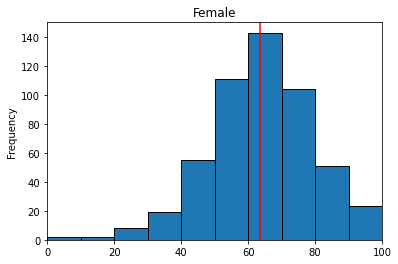

In [50]:
plt.xlim([0, 100])
plt.title("Female")
d = df[df['gender'] == 'female']['math score']
plt.axvline(x=d.mean(),color='red')
d.plot.hist(edgecolor='black');
# df[df['gender'] == 'female']['reading score'].plot.hist()
# df[df['gender'] == 'female']['writing score'].plot.hist()

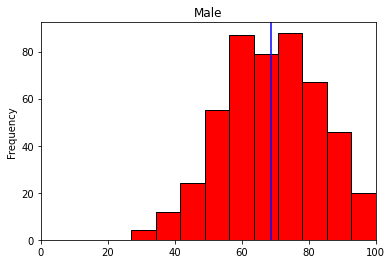

In [53]:
plt.xlim([0, 100])
plt.title("Male")
d = df[df['gender'] == 'male']['math score']
plt.axvline(x=d.mean(),color='blue')
d.plot.hist(edgecolor='black',color='red');

In [39]:
df['gender'] = np.where(df['gender'] == 'female', 0, 1)

In [51]:
rs = smf.ols("Q('math score') ~ Q('gender')",data=df).fit()

In [52]:
print(rs.summary())

                            OLS Regression Results                            
Dep. Variable:        Q('math score')   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     28.98
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           9.12e-08
Time:                        08:26:59   Log-Likelihood:                -4123.0
No. Observations:                1000   AIC:                             8250.
Df Residuals:                     998   BIC:                             8260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              63.6332    

In [60]:
# df1 = pd.read_csv('gender_submission.csv')
df = pd.read_csv('train.csv')

In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


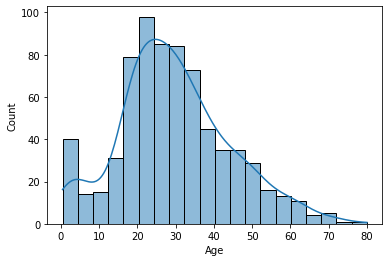

In [66]:
sns.histplot(data=df, x='Age', kde=True);

In [91]:
print(smf.logit("Q('Survived') ~ Q('Age')", data=df[df['Sex'] == 'male']).fit().summary())

Optimization terminated successfully.
         Current function value: 0.500242
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Q('Survived')   No. Observations:                  453
Model:                          Logit   Df Residuals:                      451
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:                 0.01461
Time:                        09:04:04   Log-Likelihood:                -226.61
converged:                       True   LL-Null:                       -229.97
Covariance Type:            nonrobust   LLR p-value:                  0.009530
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7240      0.266     -2.726      0.006      -1.244      -0.204
Q('Age')      -0.0214      0.

In [92]:
print(smf.logit("Q('Survived') ~ Q('Age')", data=df[df['Sex'] == 'female']).fit().summary())

Optimization terminated successfully.
         Current function value: 0.550162
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Q('Survived')   No. Observations:                  261
Model:                          Logit   Df Residuals:                      259
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:                 0.01230
Time:                        09:04:17   Log-Likelihood:                -143.59
converged:                       True   LL-Null:                       -145.38
Covariance Type:            nonrobust   LLR p-value:                   0.05862
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5938      0.310      1.913      0.056      -0.014       1.202
Q('Age')       0.0197      0.

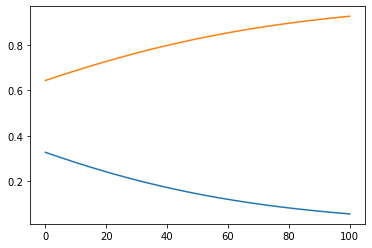

In [93]:
t = np.linspace(0, 100)
y = lambda x: 1/(1 + np.exp(0.7240+0.0214*x))
plt.plot(t, y(t))
y = lambda x: 1/(1 + np.exp(-0.5938 - 0.0197*x))
plt.plot(t, y(t))

In [94]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [95]:
print(smf.logit("Q('Survived') ~ Q('Age')", data=df[df['Pclass'] == 3]).fit().summary())

Optimization terminated successfully.
         Current function value: 0.528679
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Q('Survived')   No. Observations:                  355
Model:                          Logit   Df Residuals:                      353
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:                 0.03952
Time:                        09:08:03   Log-Likelihood:                -187.68
converged:                       True   LL-Null:                       -195.40
Covariance Type:            nonrobust   LLR p-value:                 8.503e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1646      0.279     -0.591      0.555      -0.711       0.382
Q('Age')      -0.0422      0.

In [96]:
print(smf.logit("Q('Survived') ~ Q('Age')", data=df[df['Pclass'] == 2]).fit().summary())

Optimization terminated successfully.
         Current function value: 0.653274
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Q('Survived')   No. Observations:                  173
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:                 0.05641
Time:                        09:08:11   Log-Likelihood:                -113.02
converged:                       True   LL-Null:                       -119.77
Covariance Type:            nonrobust   LLR p-value:                 0.0002369
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1893      0.399      2.984      0.003       0.408       1.970
Q('Age')      -0.0428      0.

In [97]:
print(smf.logit("Q('Survived') ~ Q('Age')", data=df[df['Pclass'] == 1]).fit().summary())

Optimization terminated successfully.
         Current function value: 0.606849
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Q('Survived')   No. Observations:                  186
Model:                          Logit   Df Residuals:                      184
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:                 0.05726
Time:                        09:08:18   Log-Likelihood:                -112.87
converged:                       True   LL-Null:                       -119.73
Covariance Type:            nonrobust   LLR p-value:                 0.0002131
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2425      0.491      4.565      0.000       1.280       3.205
Q('Age')      -0.0404      0.

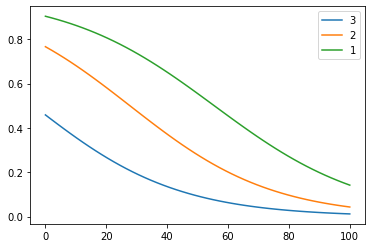

In [102]:
t = np.linspace(0, 100)
y = lambda x: 1/(1 + np.exp(--0.1646--0.0422*x))
plt.plot(t, y(t), label='3')
y = lambda x: 1/(1 + np.exp(-1.1893--0.0428*x))
plt.plot(t, y(t), label='2')
y = lambda x: 1/(1 + np.exp(-2.2425--0.0404*x))
plt.plot(t, y(t), label='1')
plt.legend();

In [116]:
df = pd.read_excel('data-analysis.xlsx')

In [150]:
df['quan diem'] = (df['agree'] > df['disagree'])*1

In [151]:
df.head(5)

,edu,sex,agree,disagree,quan diem
0,0,Male,4,2,1
1,1,Male,2,0,1
2,2,Male,4,0,1
3,3,Male,6,3,1
4,4,Male,5,5,0


In [152]:
print(smf.logit("Q('quan diem') ~ Q('edu')", data=df[df['sex'] == 'Male']).fit().summary())

Optimization terminated successfully.
         Current function value: 0.242568
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Q('quan diem')   No. Observations:                   21
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:                  0.6350
Time:                        10:34:48   Log-Likelihood:                -5.0939
converged:                       True   LL-Null:                       -13.955
Covariance Type:            nonrobust   LLR p-value:                 2.556e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7709      2.342      2.037      0.042       0.180       9.362
Q('edu')      -0.6369      0.

In [126]:
print(smf.logit("Q('quan diem') ~ Q('edu')", data=df[df['sex'] == 'Female']).fit().summary())

Optimization terminated successfully.
         Current function value: 0.441799
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Q('quan diem')   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:                  0.3572
Time:                        10:11:29   Log-Likelihood:                -8.8360
converged:                       True   LL-Null:                       -13.747
Covariance Type:            nonrobust   LLR p-value:                  0.001725
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0885      1.172      1.782      0.075      -0.209       4.386
Q('edu')      -0.2171      0.

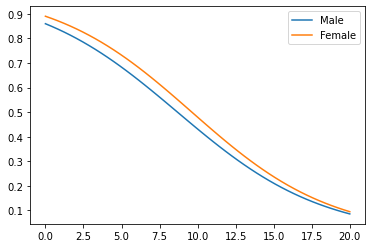

In [153]:
t = np.linspace(0, 20)
y = lambda x: 1/(1 + np.exp(-1.8103 + 0.2087*x))
plt.plot(t, y(t), label='Male')
y = lambda x: 1/(1 + np.exp(-2.0885 + 0.2171*x))
plt.plot(t, y(t), label='Female')
plt.legend();

In [130]:
print(smf.logit("Q('quan diem') ~ Q('edu') + Q('sex')", data=df).fit().summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Q('quan diem')   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 Mar 2022   Pseudo R-squ.:                  0.3435
Time:                        10:16:59   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.0442      0.889      2.299      0.022       0.302       3.787
Q('sex')[T.

In [158]:
df = pd.read_csv('data.csv')

In [159]:
df

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...


In [164]:
print(smf.ols('Q("likes") ~ Q("views")', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:             Q("likes")   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.018e+06
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:46:33   Log-Likelihood:                -50903.
No. Observations:                5440   AIC:                         1.018e+05
Df Residuals:                    5438   BIC:                         1.018e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    415.1048     43.892      9.457      0.0

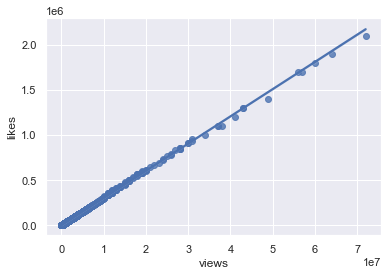

In [168]:
sns.set_theme(color_codes=True)
sns.regplot(x='views', y='likes', data=df);

In [189]:
df = pd.read_csv('data2.csv')
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [190]:
df['Wage'] = df['Wage'].str.extract(r'(\d+)').astype('int64')
df['Value'] = df['Value'].str.extract(r'(\d+)').astype('int64')

In [198]:
print(smf.ols("Q('Wage') ~ Q('Age')", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Q('Wage')   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     370.1
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.18e-81
Time:                        11:09:00   Log-Likelihood:                -81929.
No. Observations:               18207   AIC:                         1.639e+05
Df Residuals:                   18205   BIC:                         1.639e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9727      0.883     -7.895      0.0

<AxesSubplot:xlabel='Age', ylabel='Wage'>

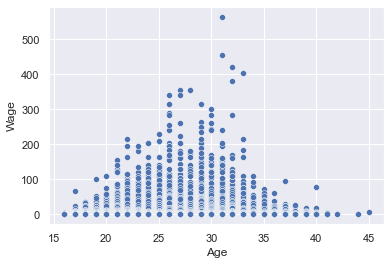

In [200]:
sns.scatterplot(x='Age', y='Wage',data=df)